### Question 3 - [10 marks]

##### Use dataset available on http://users.stat.ufl.edu/~winner/data/nfl2008_fga.csv

##### a.	Use LDA to classify the dataset into few classes so that at least 90% of information of dataset is explained through new classification. (Hint: model the variable “qtr” to variables “togo”, “kicker”, and “ydline”). How many LDs do you choose? Explain the reason.                                                           [5]                      
##### b.	Apply PCA, and identify the important principle components involving at least 90% of dataset variation. Explain your decision strategy?  Plot principle components versus their variance.  [5]                                       


In [110]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,classification_report,confusion_matrix

In [111]:
#Read Dataset
url = 'http://users.stat.ufl.edu/~winner/data/nfl2008_fga.csv'
data = pd.read_csv(url)
data.head()

,GameDate,AwayTeam,HomeTeam,qtr,min,sec,kickteam,def,down,togo,...,distance,homekick,kickdiff,timerem,offscore,defscore,season,GOOD,Missed,Blocked
0,20081130,IND,CLE,1,47,2,IND,CLE,4.0,11.0,...,30,0,-3,2822,0,3,2008,1,0,0
1,20081005,IND,HOU,1,54,47,IND,HOU,4.0,3.0,...,46,0,0,3287,0,0,2008,1,0,0
2,20081228,TEN,IND,1,45,20,IND,TEN,4.0,3.0,...,28,1,7,2720,7,0,2008,1,0,0
3,20081012,BAL,IND,1,45,42,IND,BAL,4.0,1.0,...,37,1,14,2742,14,0,2008,1,0,0
4,20080907,CHI,IND,1,50,56,IND,CHI,4.0,21.0,...,39,1,0,3056,0,0,2008,1,0,0


In [112]:
#Check Nulls
data.isnull().sum()

GameDate    0
AwayTeam    0
HomeTeam    0
qtr         0
min         0
sec         0
kickteam    0
def         0
down        2
togo        2
kicker      0
ydline      0
name        0
distance    0
homekick    0
kickdiff    0
timerem     0
offscore    0
defscore    0
season      0
GOOD        0
Missed      0
Blocked     0
dtype: int64

In [113]:
#Check Stats
data.describe()

,GameDate,qtr,min,sec,down,togo,kicker,ydline,distance,homekick,kickdiff,timerem,offscore,defscore,season,GOOD,Missed,Blocked
count,1.039000e+03,1039.000000,1039.000000,1039.000000,1037.000000,1037.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.0,1039.000000,1039.000000,1039.000000
mean,2.008140e+07,2.497594,27.968239,26.551492,3.818708,6.738669,19.537055,18.768046,36.666025,0.494706,0.382098,1704.645813,9.949952,9.567854,2008.0,0.866218,0.133782,0.021174
std,1.702338e+03,1.108621,16.716783,18.107977,0.635134,4.155772,11.303244,10.187505,9.847836,0.500213,9.675133,1003.771275,9.434869,8.365389,0.0,0.340582,0.340582,0.144034
min,2.008090e+07,1.000000,-15.000000,0.000000,1.000000,1.000000,1.000000,1.000000,18.000000,0.000000,-41.000000,-887.000000,0.000000,0.000000,2008.0,0.000000,0.000000,0.000000
25%,2.008100e+07,2.000000,14.000000,9.500000,4.000000,4.000000,9.000000,10.000000,28.000000,0.000000,-6.000000,895.500000,0.000000,3.000000,2008.0,1.000000,0.000000,0.000000
50%,2.008111e+07,2.000000,30.000000,25.000000,4.000000,6.000000,20.000000,19.000000,37.000000,0.000000,0.000000,1808.000000,7.000000,7.000000,2008.0,1.000000,0.000000,0.000000
75%,2.008120e+07,4.000000,42.000000,43.000000,4.000000,9.000000,30.000000,26.000000,44.000000,1.000000,6.000000,2556.500000,16.000000,14.000000,2008.0,1.000000,0.000000,0.000000
max,2.009020e+07,5.000000,58.000000,59.000000,4.000000,25.000000,37.000000,86.000000,76.000000,1.000000,44.000000,3507.000000,48.000000,44.000000,2008.0,1.000000,1.000000,1.000000


In [114]:

print('Class labels:', np.unique(data['qtr']))

Class labels: [1 2 3 4 5]


In [115]:
#Filled Nulls with '0'
data = data.fillna(0)
data.isnull().sum().count

<bound method Series.count of GameDate    0
AwayTeam    0
HomeTeam    0
qtr         0
min         0
sec         0
kickteam    0
def         0
down        0
togo        0
kicker      0
ydline      0
name        0
distance    0
homekick    0
kickdiff    0
timerem     0
offscore    0
defscore    0
season      0
GOOD        0
Missed      0
Blocked     0
dtype: int64>

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GameDate  1039 non-null   int64  
 1   AwayTeam  1039 non-null   object 
 2   HomeTeam  1039 non-null   object 
 3   qtr       1039 non-null   int64  
 4   min       1039 non-null   int64  
 5   sec       1039 non-null   int64  
 6   kickteam  1039 non-null   object 
 7   def       1039 non-null   object 
 8   down      1039 non-null   float64
 9   togo      1039 non-null   float64
 10  kicker    1039 non-null   int64  
 11  ydline    1039 non-null   int64  
 12  name      1039 non-null   object 
 13  distance  1039 non-null   int64  
 14  homekick  1039 non-null   int64  
 15  kickdiff  1039 non-null   int64  
 16  timerem   1039 non-null   int64  
 17  offscore  1039 non-null   int64  
 18  defscore  1039 non-null   int64  
 19  season    1039 non-null   int64  
 20  GOOD      1039 non-null   int6

In [117]:
X= data[['togo','kicker', 'ydline']]
y= data['qtr']

In [118]:
X.shape

(1039, 3)

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [120]:
#Applying Decision Tree on Original Dataset

acc = [] ### Blank vector
for i in range(1000):
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)# split dataset
  model_dt=DecisionTreeClassifier() # model
  dt = model_dt.fit(X_train,y_train) # fit the model
  YPred = dt.predict(X_test) # predict
  a = accuracy_score(y_test,YPred) # compute accuracy
  acc.append(a) # append accuracy
print("Accuracy using 1000 MC run:", np.mean(acc))  # average of accuracy to stablize the result


Accuracy using 1000 MC run: 0.2653782051282051


#### LDA
- Creates linear combination of the original features
- Number of such transformations are 1 less than the number of classes (the classes are well seperated)
- Very similar to PCA, LDA is supervised

```math
ld1 = 0.5*x1 + 0.2*x2 + 0.3*x3
```

In [121]:
lda_model = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda_model.fit_transform(X, y)

In [122]:
X_lda.shape

(1039, 2)

In [123]:

LDA=pd.DataFrame(X_lda)
LDA.columns=['lda1','lda2']

In [124]:
a=lda_model.explained_variance_ratio_
a

array([0.69027229, 0.24866688])

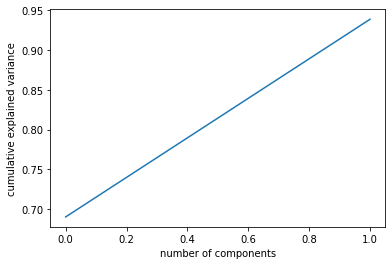

In [125]:
plt.plot(np.cumsum(a))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [127]:
from sklearn.model_selection import train_test_split 
acc = [] ### Blank vector
for i in range(1000):
  X_train,X_test,y_train,y_test=train_test_split(X_lda,y,test_size=0.3)# split dataset
  model_dt=DecisionTreeClassifier() # model
  dt = model_dt.fit(X_train,y_train) # fit the model
  YPred = dt.predict(X_test) # predict
  a = accuracy_score(y_test,YPred) # compute accuracy
  acc.append(a) # append accuracy
print("Accuracy using 1000 MC run:", np.mean(acc))  # average of accuracy to stablize the result

Accuracy using 1000 MC run: 0.26652564102564097


In [128]:
#PCA

# define a matrix
 
# create the PCA instance
pca = PCA(n_components=2)
# fit on data
pca.fit(X)
# access values and vectors
PCAs=pca.components_
df=pd.DataFrame(PCAs)
df_pca=df.T  # transpose the dataframe 
df_pca.columns=['pca1','pca2']
df_pca.head()


,pca1,pca2
0,0.014001,0.133169
1,-0.995902,0.090416
2,0.089346,0.986960


In [129]:
#Variance explained by each component
print(pca.explained_variance_)

[127.94964705 105.20798025]


In [130]:
ratio_var=pca.explained_variance_/sum(pca.explained_variance_)

In [131]:
df_new=np.dot(X, df_pca)

In [132]:

acc = [] ### Blank vector
for i in range(1000):
  X_train,X_test,y_train,y_test=train_test_split(df_new,y,test_size=0.3)# split dataset
  model_dt=DecisionTreeClassifier() # model
  dt = model_dt.fit(X_train,y_train) # fit the model
  YPred = dt.predict(X_test) # predict
  a = accuracy_score(y_test,YPred) # compute accuracy
  acc.append(a) # append accuracy
print("Accuracy using 1000 MC run:", np.mean(acc))  # average of accuracy to stablize the result


Accuracy using 1000 MC run: 0.267826923076923
